<a href="https://colab.research.google.com/github/kb5465/mashHF/blob/main/Thesis_GTEX_OT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup: Gene names.

In [2]:
import pandas as pd

# Given lists of Ensembl IDs and gene names
ensembl_ids = [
    "ENSG00000155657", "ENSG00000134571", "ENSG00000006747", "ENSG00000007306", "ENSG00000041515",
    "ENSG00000044459", "ENSG00000046889", "ENSG00000048052", "ENSG00000068781", "ENSG00000069248",
    "ENSG00000072210", "ENSG00000080007", "ENSG00000083635", "ENSG00000086506", "ENSG00000088827",
    "ENSG00000099899", "ENSG00000100344", "ENSG00000100360", "ENSG00000100441", "ENSG00000101331",
    "ENSG00000103150", "ENSG00000105122", "ENSG00000105136", "ENSG00000105671", "ENSG00000106328",
    "ENSG00000108515", "ENSG00000109736", "ENSG00000109944", "ENSG00000112280", "ENSG00000115239",
    "ENSG00000115525", "ENSG00000115705", "ENSG00000120279", "ENSG00000123064", "ENSG00000129696",
    "ENSG00000132463", "ENSG00000132635", "ENSG00000132781", "ENSG00000133048", "ENSG00000133103",
    "ENSG00000133454", "ENSG00000133962", "ENSG00000134014", "ENSG00000134070", "ENSG00000136273",
    "ENSG00000136783", "ENSG00000137198", "ENSG00000138346", "ENSG00000139988", "ENSG00000140400",
    "ENSG00000142082", "ENSG00000142192", "ENSG00000145949", "ENSG00000146282", "ENSG00000146350",
    "ENSG00000148399", "ENSG00000149054", "ENSG00000151779", "ENSG00000154102", "ENSG00000157870",
    "ENSG00000160191", "ENSG00000161958", "ENSG00000164404", "ENSG00000164483", "ENSG00000165071",
    "ENSG00000165115", "ENSG00000166529", "ENSG00000167515", "ENSG00000167733", "ENSG00000169903",
    "ENSG00000170379", "ENSG00000170445", "ENSG00000171564", "ENSG00000176485", "ENSG00000178665",
    "ENSG00000179044", "ENSG00000179142", "ENSG00000179270", "ENSG00000179709", "ENSG00000181031",
    "ENSG00000183844", "ENSG00000188959", "ENSG00000196188", "ENSG00000198483", "ENSG00000203780",
    "ENSG00000205129", "ENSG00000213563", "ENSG00000214814", "ENSG00000235718", "ENSG00000242441",
    "ENSG00000248385", "ENSG00000248919", "ENSG00000249222", "ENSG00000249319", "ENSG00000253910",
    "ENSG00000274391", "ENSG00000278558", "ENSG00000129151", "ENSG00000215568", "ENSG00000099957"
]

gencode_ids = [
    "ENSG00000155657.29", "ENSG00000134571.12", "ENSG00000006747.15", "ENSG00000007306.15", "ENSG00000041515.16",
    "ENSG00000044459.15", "ENSG00000046889.19", "ENSG00000048052.24", "ENSG00000068781.21", "ENSG00000069248.12",
    "ENSG00000072210.19", "ENSG00000080007.8", "ENSG00000083635.8", "ENSG00000086506.3", "ENSG00000088827.13",
    "ENSG00000099899.15", "ENSG00000100344.11", "ENSG00000100360.15", "ENSG00000100441.10", "ENSG00000101331.17",
    "ENSG00000103150.7", "ENSG00000105122.13", "ENSG00000105136.22", "ENSG00000105671.12", "ENSG00000106328.10",
    "ENSG00000108515.18", "ENSG00000109736.15", "ENSG00000109944.11", "ENSG00000112280.18", "ENSG00000115239.24",
    "ENSG00000115525.18", "ENSG00000115705.22", "ENSG00000120279.7", "ENSG00000123064.13", "ENSG00000129696.13",
    "ENSG00000132463.15", "ENSG00000132635.17", "ENSG00000132781.20", "ENSG00000133048.13", "ENSG00000133103.17",
    "ENSG00000133454.16", "ENSG00000133962.8", "ENSG00000134014.17", "ENSG00000134070.5", "ENSG00000136273.13",
    "ENSG00000136783.10", "ENSG00000137198.10", "ENSG00000138346.15", "ENSG00000139988.10", "ENSG00000140400.18",
    "ENSG00000142082.15", "ENSG00000142192.21", "ENSG00000145949.11", "ENSG00000146282.19", "ENSG00000146350.14",
    "ENSG00000148399.13", "ENSG00000149054.16", "ENSG00000151779.13", "ENSG00000154102.11", "ENSG00000157870.17",
    "ENSG00000160191.18", "ENSG00000161958.11", "ENSG00000164404.9", "ENSG00000164483.17", "ENSG00000165071.15",
    "ENSG00000165115.15", "ENSG00000166529.16", "ENSG00000167515.10", "ENSG00000167733.14", "ENSG00000169903.7",
    "ENSG00000170379.21", "ENSG00000170445.16", "ENSG00000171564.12", "ENSG00000176485.13", "ENSG00000178665.16",
    "ENSG00000179044.16", "ENSG00000179142.2", "ENSG00000179270.7", "ENSG00000179709.8", "ENSG00000181031.16",
    "ENSG00000183844.17", "ENSG00000188959.10", "ENSG00000196188.12", "ENSG00000198483.13", "ENSG00000203780.12",
    "ENSG00000205129.9", "ENSG00000213563.7", "ENSG00000214814.7", "ENSG00000235718.9", "ENSG00000242441.8",
    "ENSG00000248385.8", "ENSG00000248919", "ENSG00000249222.1", "ENSG00000249319", "ENSG00000253910.3",
    "ENSG00000274391.5", "ENSG00000278558.5", "ENSG00000129151.9", "ENSG00000215568.9", "ENSG00000099957.17"
]

genes = [
    "TTN", "MYBPC3", "SCIN", "CEACAM7", "MYO16", "CNTLN", "PREX2", "HDAC9",
    "STON1-GTF2A1L", "NUP133", "ALDH3A2", "DDX43", "NUFIP1", "HBQ1", "SIGLEC1", "TRMT2A",
    "PNPLA3", "IFT27", "KHNYN", "CCM2L", "MLYCD", "RASAL3", "ZNF419", "DDX49",
    "FSCN3", "ENO3", "MFSD10", "JHY", "COL9A1", "ASB3", "ST3GAL5", "TPO",
    "MYCT1", "DDX54", "TTI2", "GRSF1", "PCED1A", "MUTYH", "CHI3L1", "COG6",
    "MYO18B", "CATSPERB", "ELP3", "IRAK2", "HUS1", "NIPSNAP3A", "GMPR", "DNA2",
    "RDH12", "MAN2C1", "SIRT3", "APP", "MYLK4", "RARS2", "TBC1D32", "DPH7",
    "ZNF215", "NBAS", "C16orf74", "PRXL2B", "PDE9A", "FGF11", "GDF9", "SAMD3",
    "TMEM71", "KIF27", "ZSCAN21", "TRAPPC2L", "HSD11B1L", "TM4SF4", "TCAF2", "HARS1",
    "FGB", "PLAAT3", "ZNF713", "EXOC3L1", "CYP11B2", "PCARE", "NLRP8", "RPH3AL",
    "FAM3B", "C9orf152", "CTSE", "ANKRD35", "FANK1", "CFAP96", "C8orf82", "FER1L6",
    "MFRP", "GTF2A1L", "TARM1", "ATP5MF-PTCD1", "ATP5MGL", "PCDHGB2", "TPTE", "TMEM191B",
    "BBOX1", "GAB4", "P2RX6"
]

# Match genes with corresponding Ensembl IDs
gene_ensembl_mapping = dict(zip(genes, ensembl_ids))

# Convert to DataFrame
df_mapping = pd.DataFrame(list(gene_ensembl_mapping.items()), columns=["Gene", "Ensembl_ID"])

# Display the mapping
df_mapping.head()


,Gene,Ensembl_ID
0,TTN,ENSG00000155657
1,MYBPC3,ENSG00000134571
2,SCIN,ENSG00000006747
3,CEACAM7,ENSG00000007306
4,MYO16,ENSG00000041515


2. Pull open target data.

In [3]:
import requests
import json

def get_target_data(gene_id):
  query_string = """
    query TargetAssociationsQuery(
    $id: String!
    $index: Int!
    $size: Int!
    $sortBy: String!
    $enableIndirect: Boolean!
    $datasources: [DatasourceSettingsInput!]
    $rowsFilter: [String!]
    $facetFilters: [String!]
  ) {
    target(ensemblId: $id) {
      id
      approvedSymbol
      associatedDiseases(
        page: { index: $index, size: $size }
        orderByScore: $sortBy
        enableIndirect: $enableIndirect
        datasources: $datasources
        Bs: $rowsFilter
        facetFilters: $facetFilters
      ) {
        count
        rows {
          disease {
            id
            name
          }
          score
          datasourceScores {
            componentId: id
            score
          }
        }
      }
    }
  }
  """

  # Set variables object of arguments to be passed to endpoint
  variables = {
      "id": gene_id,
      "index": 0,
      "size": 50,
      "sortBy": "score",
      "enableIndirect": False,
      "datasources": [
          {"id": "ot_genetics_portal", "weight": 1, "propagate": True, "required": False},
      ],
      "entity": "target"
  }

  # Set base URL of GraphQL API endpoint
  base_url = "https://api.platform.opentargets.org/api/v4/graphql"

  # Perform POST request and check status code of response
  r = requests.post(base_url, json={"query": query_string, "variables": variables})

  # Transform API response from JSON into Python dictionary and print in console
  api_response = json.loads(r.text)

  # Extracting relevant scores
  diseases_of_interest = ["dilated cardiomyopathy", "heart failure", 'hypertrophic cardiomyopathy']
  scores = {}

  for disease_entry in api_response["data"]["target"]["associatedDiseases"]["rows"]:
    disease_name = disease_entry["disease"]["name"]
    if disease_name in diseases_of_interest:
        scores[disease_name] = disease_entry["score"]

  # Display extracted scores
  return(scores)

In [4]:
get_target_data("ENSG00000006747")

{}

3. Get gene expression across multiple tissues.

In [5]:
import numpy as np
import pandas as pd

def get_gene_expression_analysis(gencode_id):
    """
    Fetches expression data for a gene from GTEx, calculates overexpression score and Z-score
    for the left ventricle, atrial appendage, and muscle skeletal tissue.

    Parameters:
    gencode_id (str): GENCODE ID of the gene (e.g., "ENSG00000155657.29" for TTN)

    Returns:
    pd.DataFrame: Expression, overexpression, and Z-score for selected tissues
    """
    response = requests.get(
        'https://gtexportal.org/api/v2/expression/medianGeneExpression',
        params={"gencodeId": gencode_id, "datasetId": "gtex_v10"}
    )

    if response.status_code != 200:
        raise ValueError(f"Failed to fetch data for {gencode_id}: HTTP {response.status_code}")

    expression_data = response.json()
    if "data" not in expression_data:
        raise ValueError(f"No expression data found for {gencode_id}")

    tissue_dict = {entry["tissueSiteDetailId"]: entry["median"] for entry in expression_data["data"]}

    left_ventricle_expr = tissue_dict.get("Heart_Left_Ventricle", np.nan)
    atria_expr = tissue_dict.get("Heart_Atrial_Appendage", np.nan)
    skeletal_expr = tissue_dict.get("Muscle_Skeletal", np.nan)

    # Ensure whole-body median is calculated correctly
    all_tissue_values = list(tissue_dict.values())
    whole_body_median = np.median(all_tissue_values) if all_tissue_values else np.nan

    # Compute mean and standard deviation
    all_tissue_mean = np.mean(all_tissue_values) if all_tissue_values else np.nan

    # Ensure `all_tissue_std` is initialized before referencing
    all_tissue_std = np.std(all_tissue_values) if all_tissue_values else np.nan
    if np.isnan(all_tissue_std) or all_tissue_std == 0:
        all_tissue_std = np.nan  # Avoid division by zero or undefined value

    # Compute Overexpression Score and Z-score
    expr_values = np.array([left_ventricle_expr, atria_expr, skeletal_expr], dtype=np.float64)

    # Avoid division errors when whole_body_median is NaN
    overexpression_score = np.divide(expr_values, whole_body_median, where=~np.isnan(whole_body_median))

    # Ensure standard deviation is not zero or NaN before division
    z_score = np.divide(expr_values - all_tissue_mean, all_tissue_std, where=~np.isnan(all_tissue_std))

    # Ensure all values are arrays for indexing
    overexpression_score = np.nan_to_num(overexpression_score, nan=np.nan)
    z_score = np.nan_to_num(z_score, nan=np.nan)

    results = pd.DataFrame([
        {"Gene": gencode_id, "Tissue": "Heart - Left Ventricle", "Expression (TPM)": left_ventricle_expr,
         "Overexpression Score": overexpression_score[0], "Z-Score": z_score[0]},
        {"Gene": gencode_id, "Tissue": "Heart - Atrial Appendage", "Expression (TPM)": atria_expr,
         "Overexpression Score": overexpression_score[1], "Z-Score": z_score[1]},
        {"Gene": gencode_id, "Tissue": "Muscle - Skeletal", "Expression (TPM)": skeletal_expr,
         "Overexpression Score": overexpression_score[2], "Z-Score": z_score[2]},
        {"Gene": gencode_id, "Tissue": "Whole Body Median", "Expression (TPM)": whole_body_median}
    ])

    return results


4. Make dataframe with results.

In [6]:
def generate_gene_matrix(gene_mapping):
    """
    Generates a dataframe with rows as genes and columns containing association scores
    and GTEx expression values/overexpression/z-scores for heart-related tissues.

    Parameters:
    gene_mapping (dict): Dictionary mapping gene names to Ensembl and GENCODE IDs.

    Returns:
    pd.DataFrame: Matrix with association scores and expression data.
    """
    data = []

    for gene_name, (ensembl_id, gencode_id) in gene_mapping.items():
        print(f"Processing: {gene_name} | Ensembl: {ensembl_id} | GENCODE: {gencode_id}")

        # Get disease association scores
        association_scores = get_target_data(ensembl_id)

        # Get GTEx expression and computed scores using GENCODE ID
        expression_df = get_gene_expression_analysis(gencode_id)

        # Extract expression, overexpression, and z-scores from DataFrame
        expression_data = {
            "Heart_Left_Ventricle_Expression": expression_df.loc[expression_df["Tissue"] == "Heart - Left Ventricle", "Expression (TPM)"].values[0],
            "Heart_Left_Ventricle_Overexpression": expression_df.loc[expression_df["Tissue"] == "Heart - Left Ventricle", "Overexpression Score"].values[0],
            "Heart_Left_Ventricle_ZScore": expression_df.loc[expression_df["Tissue"] == "Heart - Left Ventricle", "Z-Score"].values[0],
            "Heart_Atrial_Appendage_Expression": expression_df.loc[expression_df["Tissue"] == "Heart - Atrial Appendage", "Expression (TPM)"].values[0],
            "Heart_Atrial_Appendage_Overexpression": expression_df.loc[expression_df["Tissue"] == "Heart - Atrial Appendage", "Overexpression Score"].values[0],
            "Heart_Atrial_Appendage_ZScore": expression_df.loc[expression_df["Tissue"] == "Heart - Atrial Appendage", "Z-Score"].values[0],
            "Muscle_Skeletal_Expression": expression_df.loc[expression_df["Tissue"] == "Muscle - Skeletal", "Expression (TPM)"].values[0],
            "Muscle_Skeletal_Overexpression": expression_df.loc[expression_df["Tissue"] == "Muscle - Skeletal", "Overexpression Score"].values[0],
            "Muscle_Skeletal_ZScore": expression_df.loc[expression_df["Tissue"] == "Muscle - Skeletal", "Z-Score"].values[0],
        }

        # Combine all data into a row
        row = {
            "Gene": gene_name,
            "Ensembl_ID": ensembl_id,
            "GENCODE_ID": gencode_id,
            "HF_Score": association_scores.get("heart failure", None),
            "DCM_Score": association_scores.get("dilated cardiomyopathy", None),
            "HCM_Score": association_scores.get("hypertrophic cardiomyopathy", None),
            **expression_data
        }
        data.append(row)

    # Convert to DataFrame
    return pd.DataFrame(data)

# Create a dictionary mapping Gene Names -> (Ensembl ID, GENCODE ID)
gene_mapping = {gene: (ensembl, gencode) for gene, ensembl, gencode in zip(genes, ensembl_ids, gencode_ids)}

# Run the function on a subset of genes
genes_test = dict(list(gene_mapping.items()))  # First 10 genes
gene_matrix = generate_gene_matrix(genes_test)

gene_matrix.head()

Processing: TTN | Ensembl: ENSG00000155657 | GENCODE: ENSG00000155657.29
Processing: MYBPC3 | Ensembl: ENSG00000134571 | GENCODE: ENSG00000134571.12
Processing: SCIN | Ensembl: ENSG00000006747 | GENCODE: ENSG00000006747.15
Processing: CEACAM7 | Ensembl: ENSG00000007306 | GENCODE: ENSG00000007306.15
Processing: MYO16 | Ensembl: ENSG00000041515 | GENCODE: ENSG00000041515.16
Processing: CNTLN | Ensembl: ENSG00000044459 | GENCODE: ENSG00000044459.15
Processing: PREX2 | Ensembl: ENSG00000046889 | GENCODE: ENSG00000046889.19
Processing: HDAC9 | Ensembl: ENSG00000048052 | GENCODE: ENSG00000048052.24
Processing: STON1-GTF2A1L | Ensembl: ENSG00000068781 | GENCODE: ENSG00000068781.21
Processing: NUP133 | Ensembl: ENSG00000069248 | GENCODE: ENSG00000069248.12
Processing: ALDH3A2 | Ensembl: ENSG00000072210 | GENCODE: ENSG00000072210.19
Processing: DDX43 | Ensembl: ENSG00000080007 | GENCODE: ENSG00000080007.8
Processing: NUFIP1 | Ensembl: ENSG00000083635 | GENCODE: ENSG00000083635.8
Processing: HBQ

<ipython-input-5-630e1b162489>:49: RuntimeWarning: invalid value encountered in divide
  overexpression_score = np.divide(expr_values, whole_body_median, where=~np.isnan(whole_body_median))


Processing: PCARE | Ensembl: ENSG00000179270 | GENCODE: ENSG00000179270.7
Processing: NLRP8 | Ensembl: ENSG00000179709 | GENCODE: ENSG00000179709.8
Processing: RPH3AL | Ensembl: ENSG00000181031 | GENCODE: ENSG00000181031.16
Processing: FAM3B | Ensembl: ENSG00000183844 | GENCODE: ENSG00000183844.17
Processing: C9orf152 | Ensembl: ENSG00000188959 | GENCODE: ENSG00000188959.10
Processing: CTSE | Ensembl: ENSG00000196188 | GENCODE: ENSG00000196188.12
Processing: ANKRD35 | Ensembl: ENSG00000198483 | GENCODE: ENSG00000198483.13
Processing: FANK1 | Ensembl: ENSG00000203780 | GENCODE: ENSG00000203780.12
Processing: CFAP96 | Ensembl: ENSG00000205129 | GENCODE: ENSG00000205129.9
Processing: C8orf82 | Ensembl: ENSG00000213563 | GENCODE: ENSG00000213563.7
Processing: FER1L6 | Ensembl: ENSG00000214814 | GENCODE: ENSG00000214814.7
Processing: MFRP | Ensembl: ENSG00000235718 | GENCODE: ENSG00000235718.9
Processing: GTF2A1L | Ensembl: ENSG00000242441 | GENCODE: ENSG00000242441.8
Processing: TARM1 | En

<ipython-input-5-630e1b162489>:49: RuntimeWarning: divide by zero encountered in divide
  overexpression_score = np.divide(expr_values, whole_body_median, where=~np.isnan(whole_body_median))
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,Gene,Ensembl_ID,GENCODE_ID,HF_Score,DCM_Score,HCM_Score,Heart_Left_Ventricle_Expression,Heart_Left_Ventricle_Overexpression,Heart_Left_Ventricle_ZScore,Heart_Atrial_Appendage_Expression,Heart_Atrial_Appendage_Overexpression,Heart_Atrial_Appendage_ZScore,Muscle_Skeletal_Expression,Muscle_Skeletal_Overexpression,Muscle_Skeletal_ZScore
0,TTN,ENSG00000155657,ENSG00000155657.29,0.603238,0.847887,0.62385,63.890600,110.823825,1.148531,53.760400,93.252108,0.936261,347.055000,601.997204,7.081987
1,MYBPC3,ENSG00000134571,ENSG00000134571.12,NaN,0.637953,0.90324,1364.110000,5031.249136,5.861693,991.292000,3656.183899,4.205819,0.266169,0.981712,-0.195829
2,SCIN,ENSG00000006747,ENSG00000006747.15,NaN,NaN,NaN,0.014310,0.017769,-0.456414,0.055246,0.068600,-0.448436,0.034002,0.042221,-0.452576
3,CEACAM7,ENSG00000007306,ENSG00000007306.15,NaN,NaN,NaN,0.000000,0.000000,-0.230730,0.000000,0.000000,-0.230730,0.000000,0.000000,-0.230730
4,MYO16,ENSG00000041515,ENSG00000041515.16,NaN,NaN,NaN,0.598579,1.417904,-0.133511,0.862132,2.042205,0.236351,0.032102,0.076044,-0.928488


In [7]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(gene_matrix)

             Gene       Ensembl_ID          GENCODE_ID  HF_Score  DCM_Score  \
0             TTN  ENSG00000155657  ENSG00000155657.29  0.603238   0.847887   
1          MYBPC3  ENSG00000134571  ENSG00000134571.12       NaN   0.637953   
2            SCIN  ENSG00000006747  ENSG00000006747.15       NaN        NaN   
3         CEACAM7  ENSG00000007306  ENSG00000007306.15       NaN        NaN   
4           MYO16  ENSG00000041515  ENSG00000041515.16       NaN        NaN   
5           CNTLN  ENSG00000044459  ENSG00000044459.15       NaN        NaN   
6           PREX2  ENSG00000046889  ENSG00000046889.19       NaN        NaN   
7           HDAC9  ENSG00000048052  ENSG00000048052.24       NaN        NaN   
8   STON1-GTF2A1L  ENSG00000068781  ENSG00000068781.21       NaN        NaN   
9          NUP133  ENSG00000069248  ENSG00000069248.12       NaN        NaN   
10        ALDH3A2  ENSG00000072210  ENSG00000072210.19       NaN        NaN   
11          DDX43  ENSG00000080007   ENSG00000080007

5. Plots.

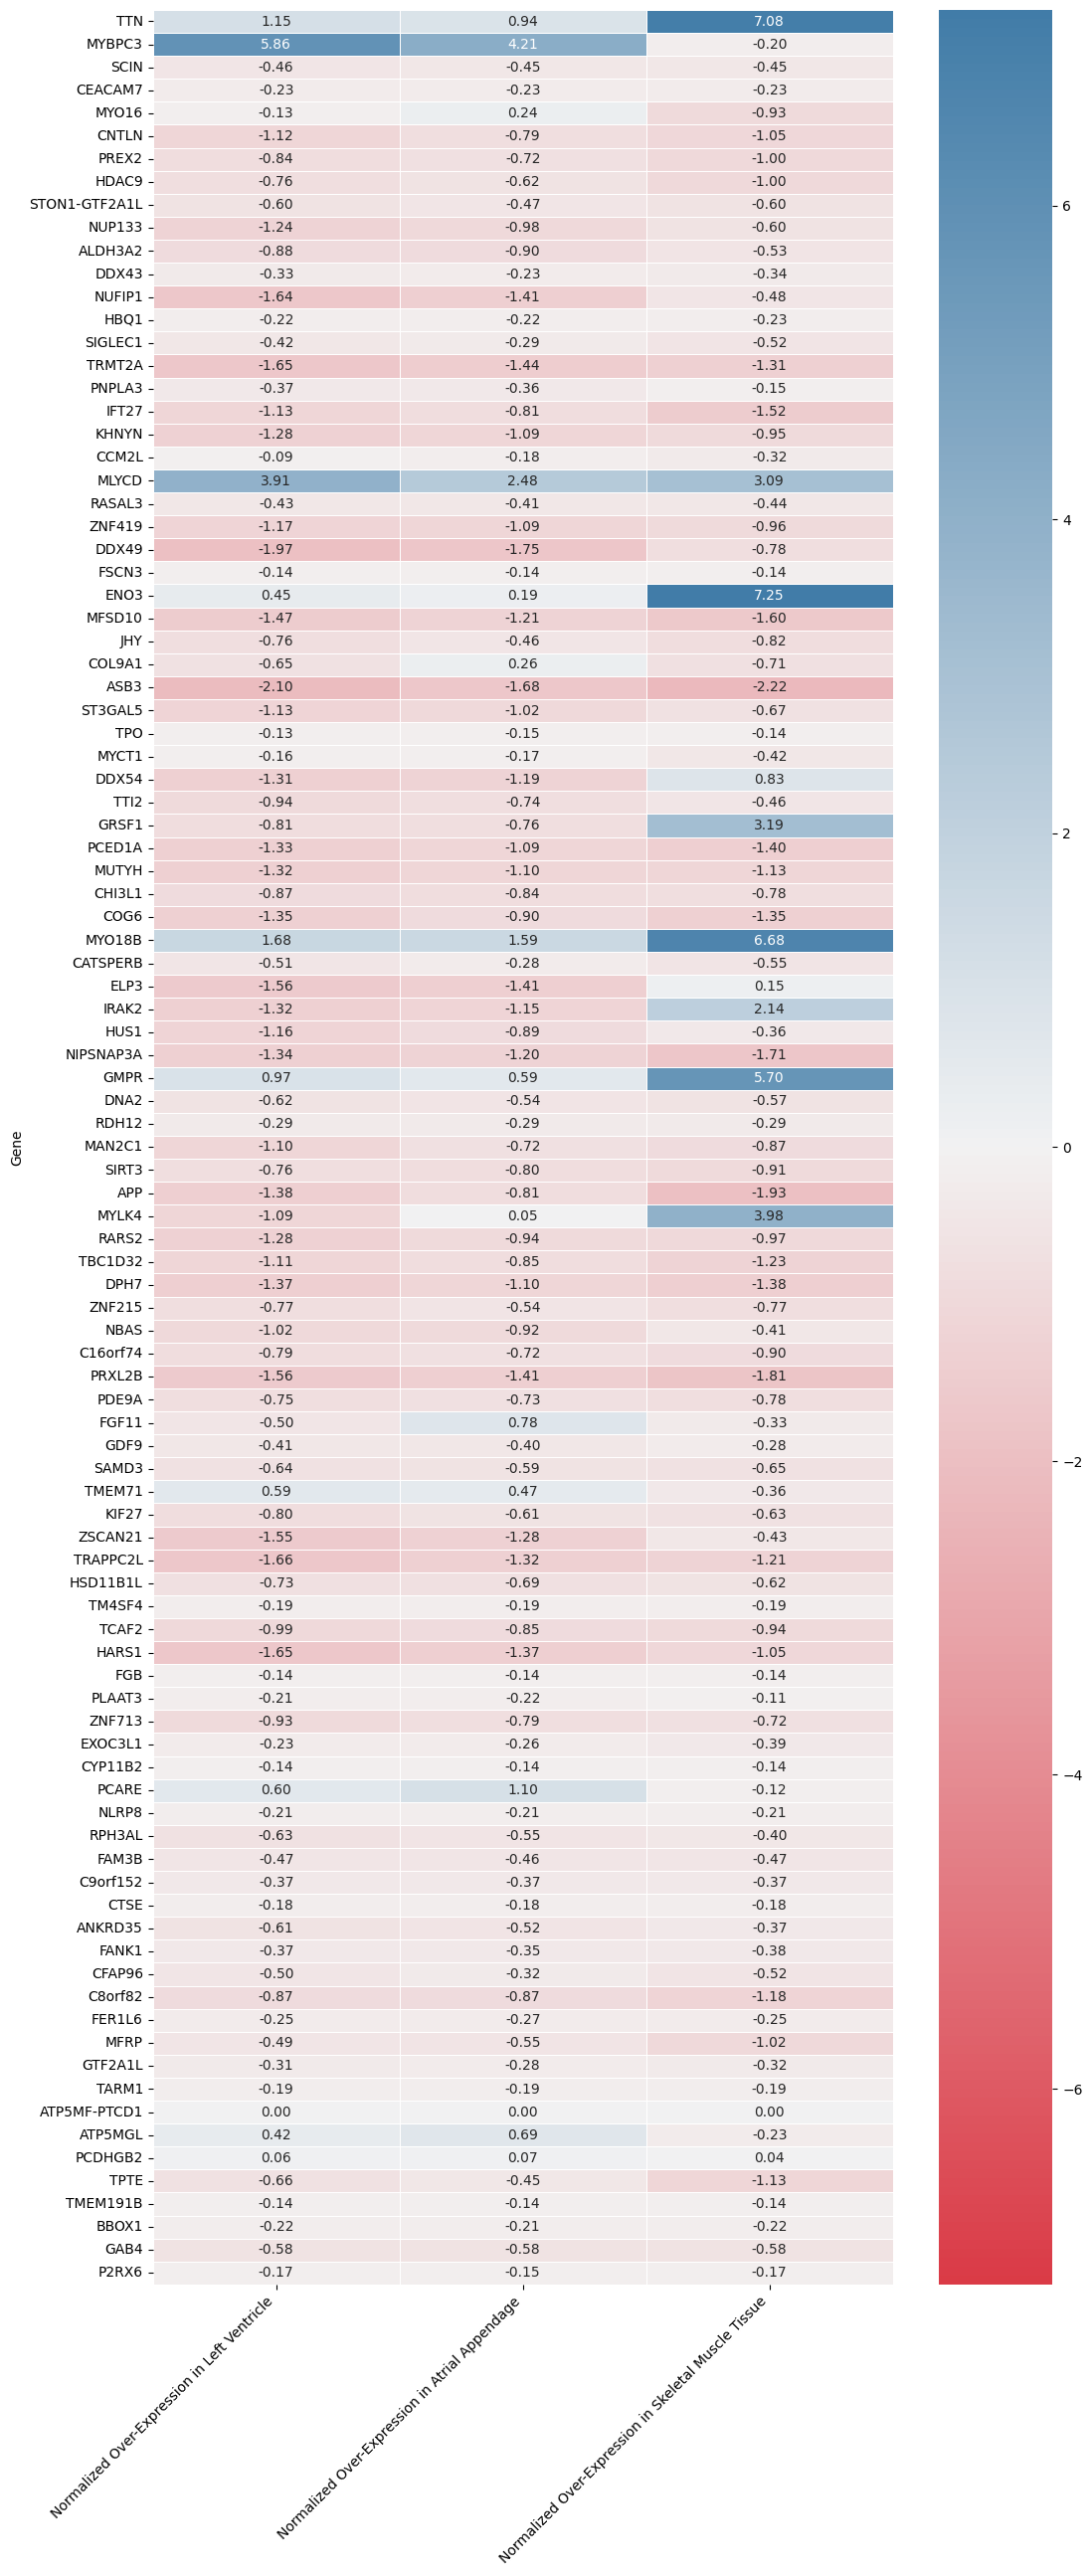

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_gene_heatmap(gene_matrix):
    """
    Plots a heatmap with genes as rows and selected scores as columns.

    Parameters:
    gene_matrix (pd.DataFrame): DataFrame containing genes as rows and scores as columns.
    """
    # Select relevant columns and rename them
    heatmap_data = gene_matrix.set_index("Gene")[
        ["Heart_Left_Ventricle_ZScore", "Heart_Atrial_Appendage_ZScore", "Muscle_Skeletal_ZScore"]
    ].rename(columns={
        "Heart_Left_Ventricle_ZScore": "Normalized Over-Expression in Left Ventricle",
        "Heart_Atrial_Appendage_ZScore": "Normalized Over-Expression in Atrial Appendage",
        "Muscle_Skeletal_ZScore": "Normalized Over-Expression in Skeletal Muscle Tissue"
    })

    # Convert data to float (handle missing values)
    heatmap_data = heatmap_data.astype(float)

    # Define color palette
    cmap = sns.diverging_palette(10, 240, as_cmap=True)  # Blue for positive, red for negative

    # Create heatmap
    plt.figure(figsize=(12, len(heatmap_data) * 0.3))
    ax = sns.heatmap(
        heatmap_data, cmap=cmap, center=0, linewidths=0.5, linecolor="white",
        cbar=True, annot=True, fmt=".2f",
        mask=heatmap_data.isnull(),  # Hide missing values
        vmin=-np.nanmax(abs(heatmap_data)), vmax=np.nanmax(abs(heatmap_data))
    )

    # Adjust labels
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)

    # Show plot
    plt.show()

# Call the function with gene_matrix
plot_gene_heatmap(gene_matrix)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_gene_heatmap(gene_matrix):
    """
    Plots a heatmap with genes as rows and selected scores as columns.

    Parameters:
    gene_matrix (pd.DataFrame): DataFrame containing genes as rows and scores as columns.
    """
    # Select relevant columns and rename them
    heatmap_data = gene_matrix.set_index("Gene")[
        ["HF_Score", "DCM_Score", "HCM_Score",
         "Heart_Left_Ventricle_ZScore", "Heart_Atrial_Appendage_ZScore", "Muscle_Skeletal_ZScore"]
    ].rename(columns={
        "HF_Score": "OpenTarget Evidence Score, HF",
        "DCM_Score": "OpenTarget Evidence Score, DCM",
        "HCM_Score": "OpenTarget Evidence Score, HCM",
        "Heart_Left_Ventricle_ZScore": "Left Ventricle",
        "Heart_Atrial_Appendage_ZScore": "Atrial Appendage",
        "Muscle_Skeletal_ZScore": "Muscle Skeletal Tissue"
    })

    # Convert data to float (handle missing values)
    heatmap_data = heatmap_data.astype(float)

    # Define color palette
    cmap = sns.diverging_palette(10, 240, as_cmap=True)  # Blue for positive, red for negative

    # Create heatmap
    plt.figure(figsize=(12, len(heatmap_data) * 0.3))
    ax = sns.heatmap(
        heatmap_data, cmap=cmap, center=0, linewidths=0.5, linecolor="white",
        cbar=True, annot=True, fmt=".2f",
        mask=heatmap_data.isnull(),  # Hide missing values
        vmin=-np.nanmax(abs(heatmap_data)), vmax=np.nanmax(abs(heatmap_data))
    )

    # Adjust labels
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)

    # Show plot
    plt.show()

# Call the function with gene_matrix
plot_gene_heatmap(gene_matrix)